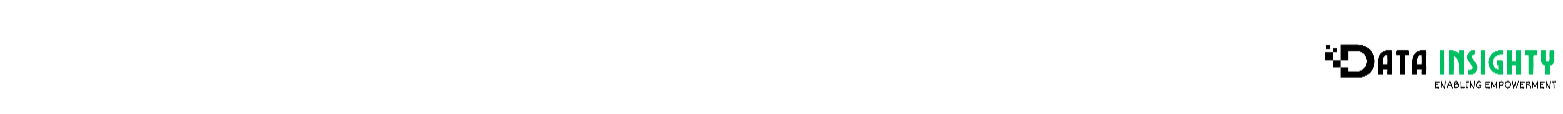

# Multiple Linear Regression with Housing price dataset

In this Regression example we will consider sales based on "Salary dataset".

In this notebook, we are going to build a simple linear regression model to predict 'Salary' using ' Years of experiance' as the independent variable.

This tutorial covers the following steps:

1. Importing libraries and loading data
2. Understanding the structure of the data
3. Performing Simple Linear Regression 
4. Evaluating Model performance 
4. Predicion using Linear Regression Model

# 1. Importing Librries and Loading data

Pandas is a powerful data manipulation and analysis library, providing data structures and functions to work with structured data.

NumPy is a fundamental package for scientific computing in Python. It provides support for multidimensional arrays and various mathematical functions to operate on these arrays.

Seaborn is a statistical data visualization library built on top of matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. pyplot is a module within Matplotlib that provides a MATLAB-like interface for plotting.

In [1]:
# Importing necessary libraries
import pandas as pd    # For data manipulation and analysis
import numpy as np     # For numerical computing
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots

Data set:https://www.kaggle.com/datasets/gopalchettri/usa-housing downloded and saved in Local machine

In [2]:
# Reading csv file from local folder
df = pd.read_csv("USA_Housing.csv")

# 2. Understanding the Data

Now, let's check the structure of the TV marketing dataset.

In [3]:
# Let's check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
# Identify variable types
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')
Categorical columns: Index(['Address'], dtype='object')



Frequency distribution for Address
Address
208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
314 Christopher Square Apt. 404\nLake Ronaldville, SD 42025      1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
481 Kaitlin Mission Apt. 309\nJodystad, IA 16947                 1
                                                                ..
054 Carter Crescent Suite 674\nGlennport, WA 11140               1
8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016           1
3737 Hartman Rue\nReneestad, ID 69250-7718                       1
3465 Latoya Well\nNelsonmouth, MI 55741-4287                     1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595          1
Name: count, Length: 5000, dtype: int64

Distribution for Avg. Area Income


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


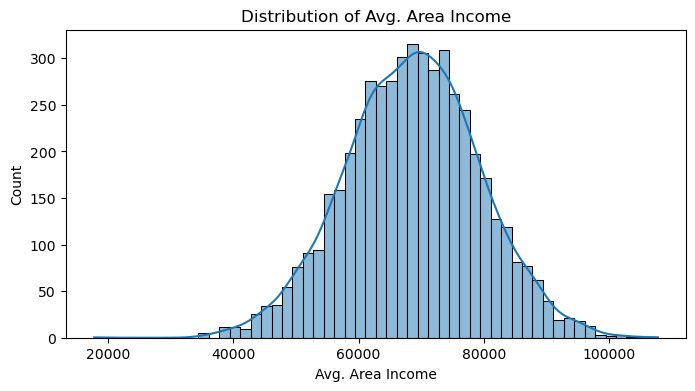


Distribution for Avg. Area House Age


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


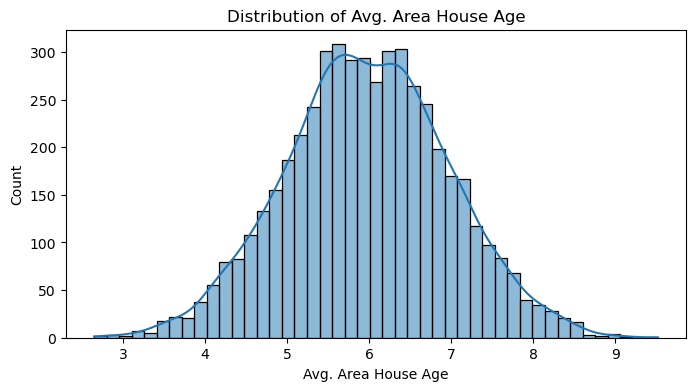


Distribution for Avg. Area Number of Rooms


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


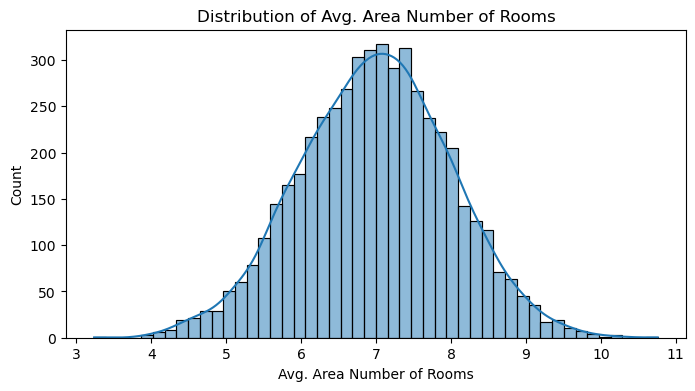

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Distribution for Avg. Area Number of Bedrooms


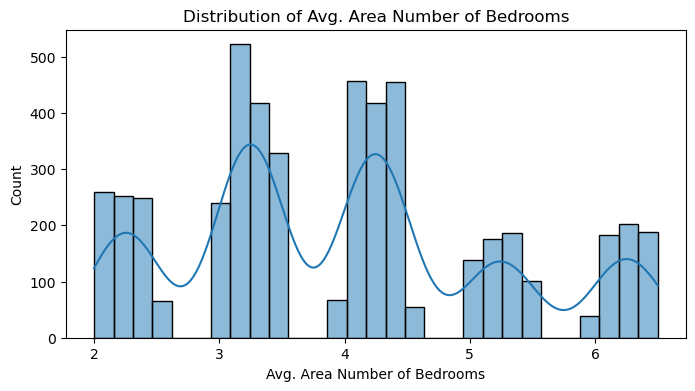

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Distribution for Area Population


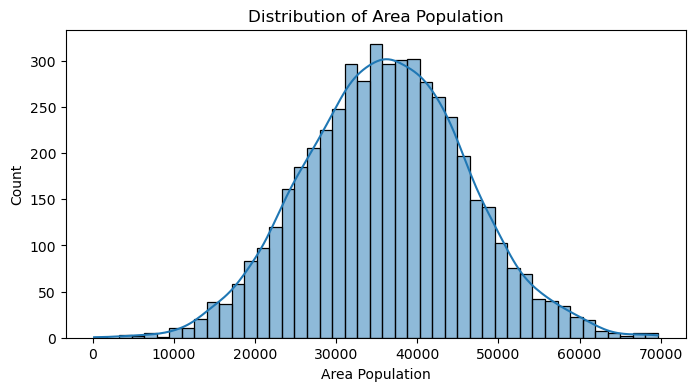


Distribution for Price


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


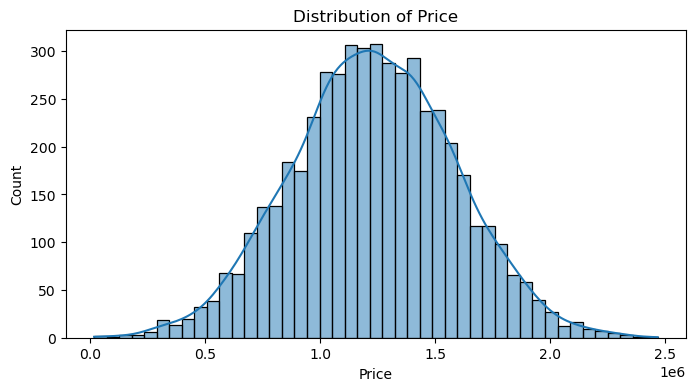

In [5]:
# Create frequency distributions
for col in categorical_cols:
    print("\nFrequency distribution for", col)
    print(df[col].value_counts())

for col in numerical_cols:
    print("\nDistribution for", col)
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title("Distribution of " + col)
    plt.show()

In [6]:
# Drop categorical columns
df = df.drop(categorical_cols, axis=1)


# Displaying the DataFrame after dropping column 'Unnamed: 0'
print("\nDataFrame after categorical columns :")
print(df)


DataFrame after categorical columns :
      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0   

In [7]:
# Display the first 5 rows
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [8]:
# Display the last 5 rows
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06


In [9]:
# Check the shape of the DataFrame (rows, columns)
df.shape

(5000, 6)

In [10]:
# Let's look at some statistical information about the dataframe.
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


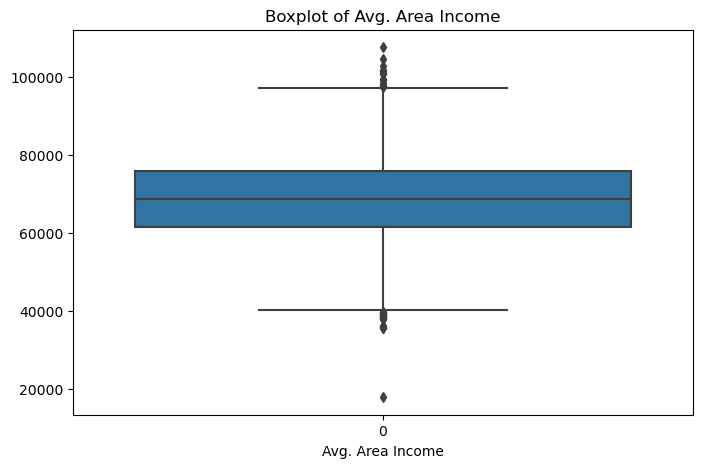

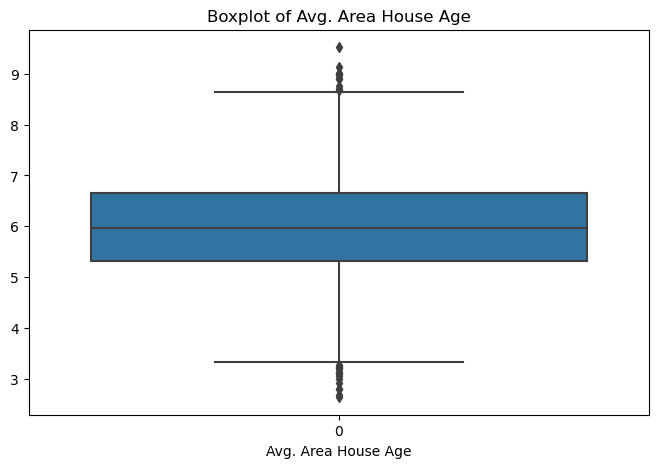

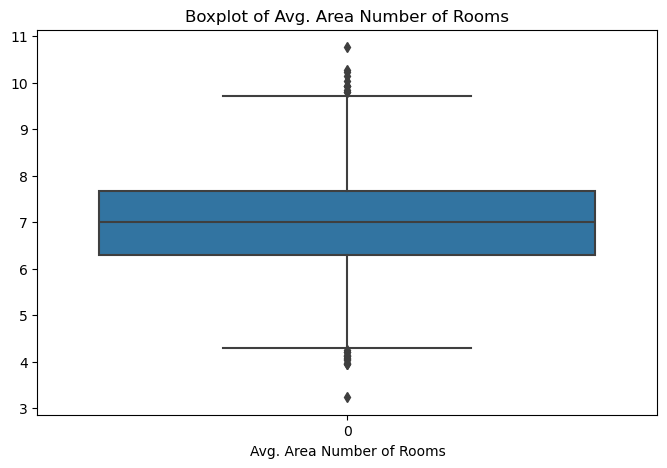

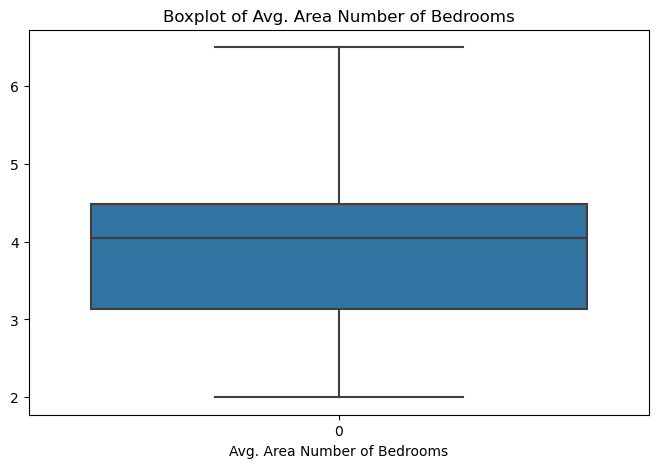

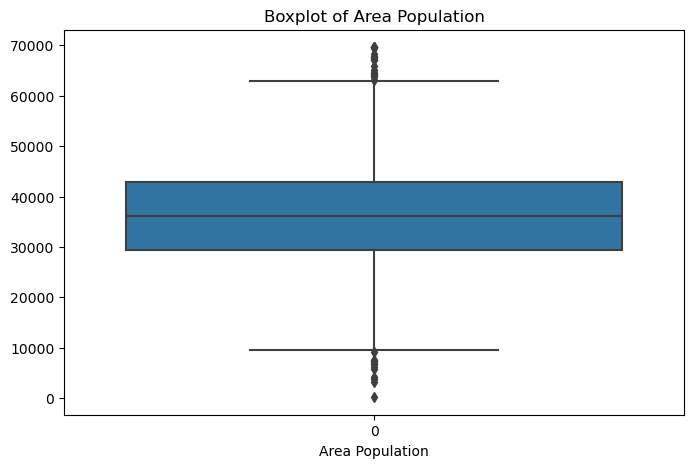

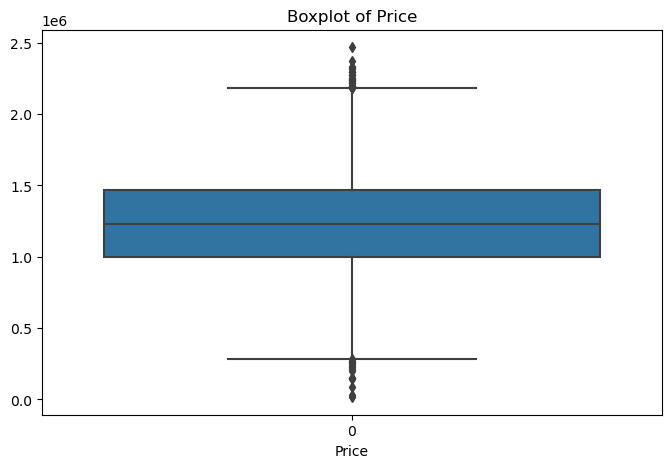

In [11]:
# Create separate boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df[col])
    plt.title("Boxplot of " + col)
    plt.xlabel(col)
    plt.show()

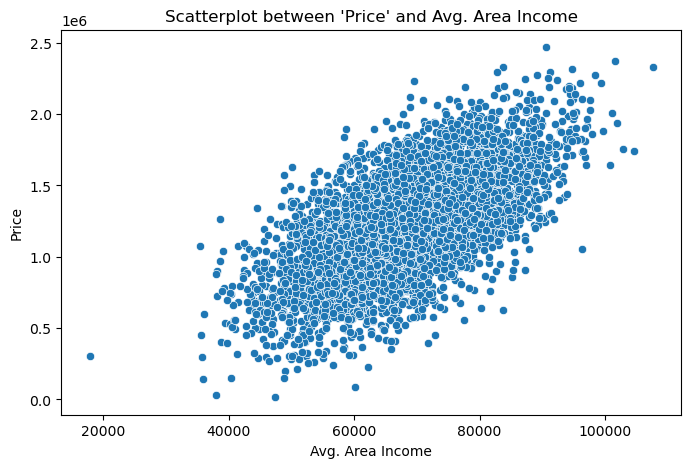

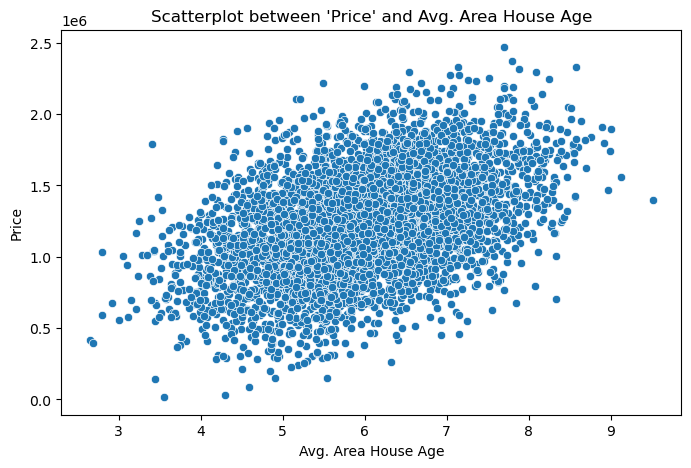

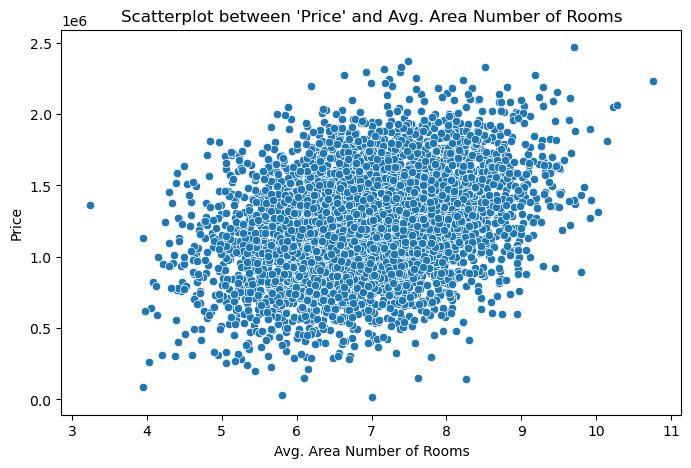

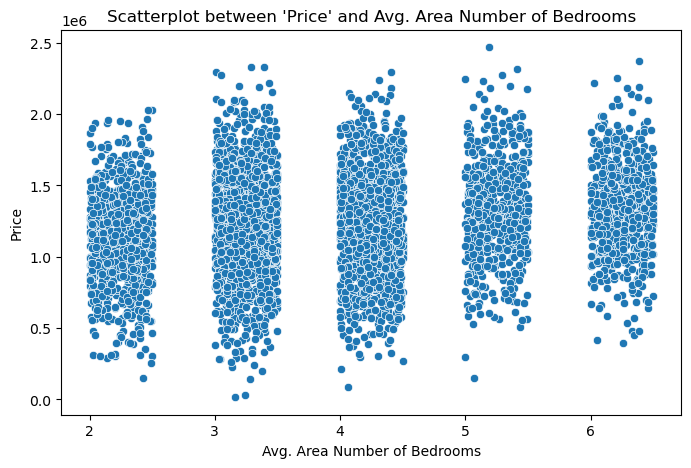

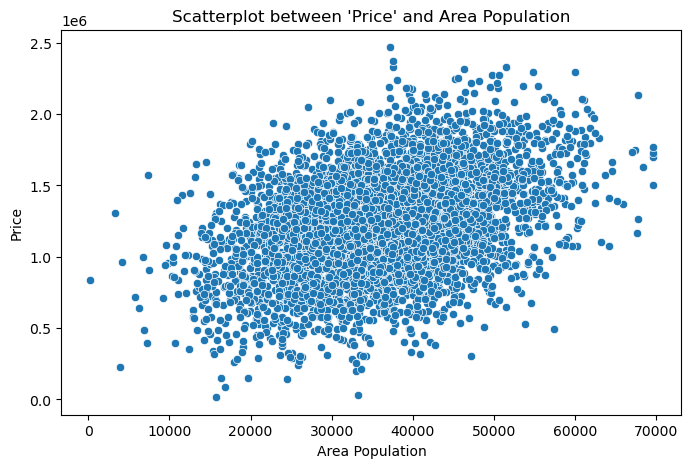

In [12]:
# Select numerical columns (excluding 'Price')
features_cols = df.drop(columns=['Price']).columns

# Create scatterplots between 'Price' and other numerical variables
for col in features_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=col, y='Price', data=df)
    plt.title("Scatterplot between 'Price' and " + col)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

<Axes: >

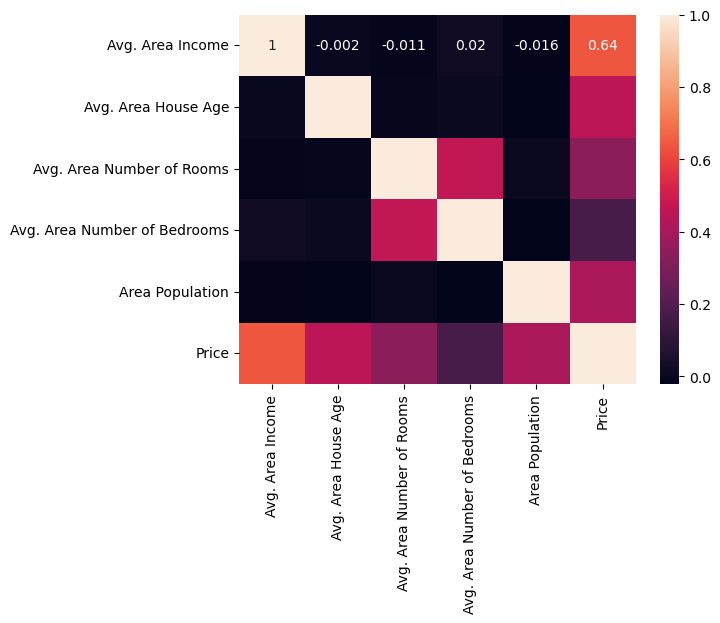

In [13]:
# Creating a heatmap of the correlation matrix for the DataFrame df
# The correlation matrix represents the correlation coefficients between different columns
# df.corr() calculates the correlation matrix for all numerical columns in the DataFrame df
# annot=True specifies that the correlation coefficients should be annotated onto the heatmap
sns.heatmap(df.corr(), annot=True)

# 3. Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:
$$
y = c + m_1x_1 + m_2x_2 + m_3x_3 + m_4x_4 + m_5x_5
$$

$$
Price = c + m_1Avg. Area Income + m_2Avg. Area House Age + m_3Avg. Area Number of Rooms + m_4Avg. Area Number of Bedrooms + m_5Area Population	Price
$$
				

The $m$ values are called the model **coefficients** or **model parameters**.

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [14]:
# Printing the column names of the DataFrame df
print(df.columns)


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')


In [15]:
# Putting feature variable to X
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

# Print the first 5 rows
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [16]:
# Putting response variable to y
y = df['Price']

# Print the first 5 rows
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

## Splitting Data into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X: Features (independent variables)
# y: Target (dependent variable)
# test_size: The proportion of the dataset to include in the test split
# random_state: Seed for random number generation, ensures reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


test_size parameter determines the proportion of the dataset to include in the test split. Here, it's set to 0.25, meaning 25% of the data will be used for testing.

random_state parameter ensures reproducibility of the split. Setting it to a fixed value (42 in this case) ensures that the same random splits are generated each time the code is run, facilitating reproducibility of results.

## Performing Linear Regression

In [18]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [19]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

In [20]:
# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

## Regression equation

In [21]:
# Get coefficients and intercept
intercept = lr.intercept_
coefficients = lr.coef_

# Generate regression equation
equation = "y = {:.3f}".format(intercept)
for i, coef in enumerate(coefficients):
    equation += " + {:.3f} * X{}".format(coef, i+1)

print("Regression Equation:", equation)

Regression Equation: y = -2633398.419 + 21.647 * X1 + 165196.273 * X2 + 119400.961 * X3 + 2086.168 * X4 + 15.211 * X5


Now, let's use this equation to predict our sales.

## Predictions

In [22]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [23]:
type(y_pred)

numpy.ndarray

In [24]:
np.shape(y_pred)

(1250,)

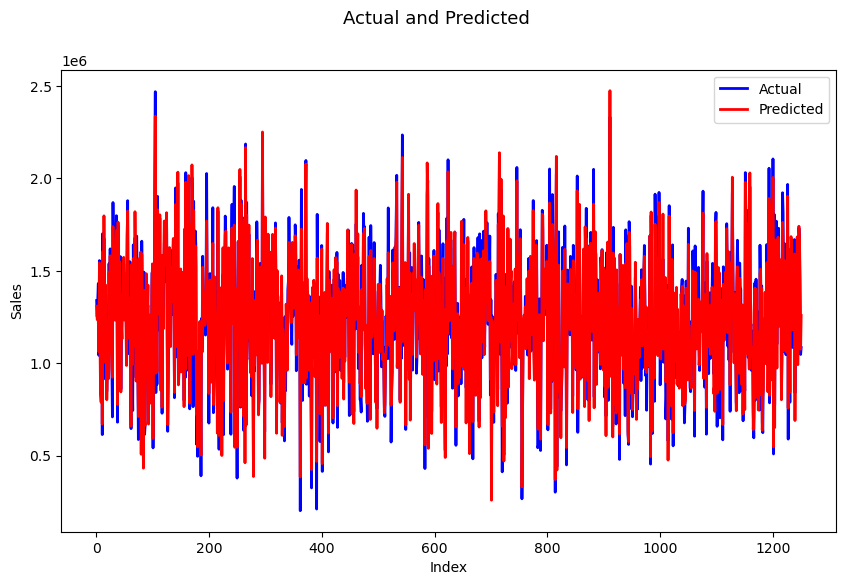

In [25]:
# Actual vs Predicted
import matplotlib.pyplot as plt

# Generating index values from 1 to 10
c = [i for i in range(1, 1251, 1)]

# Create a new figure
fig = plt.figure(figsize=(10, 6))

# Plotting the actual sales values (y_test) in blue
plt.plot(c, y_test, color="blue", linewidth=2, linestyle="-", label="Actual")

# Plotting the predicted sales values (y_pred) in red
plt.plot(c, y_pred, color="red", linewidth=2, linestyle="-", label="Predicted")

# Adding a title to the plot
fig.suptitle('Actual and Predicted', fontsize=13)

# Adding labels to the x-axis and y-axis
plt.xlabel('Index', fontsize=10)
plt.ylabel('Sales', fontsize=10)

# Displaying a legend
plt.legend()

# Displaying the plot
plt.show()


## Model Evaluation

In [26]:
# Importing necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# Calculating evaluation metrics
# Assuming y_true contains the true target values and y_pred contains the predicted values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)


#### Mean Absolute Error (MAE)

In [27]:
#This calculates the average absolute difference between the actual values and the predicted values.
# MAE can be useful when you're dealing with outliers that can significantly inflate MSE/RMSE.

print("Mean Absolute Error:", mae)

Mean Absolute Error: 80859.62543688453


Mean Absolute Error (MAE) of 5056.995: On average, model's predictions deviate from the actual values by 5056.995units in the data's scale. This suggests a moderate level of error, where predictions are typically within a few units of the real values.

#### Mean Squared Error (MSE)

In [28]:
#  This calculates the average squared difference between the actual values and the predicted values. 
# A lower MSE signifies a better fit because it means the predictions are, on average, closer to the actual values.

print("Mean Squared Error:", mse)

Mean Squared Error: 9940956140.79689


#### Root Mean Squared Error (RMSE)

In [29]:
#This is the square root of the MSE. RMSE is easier to interpret in the original units of your data compared to MSE. 
#Similar to MSE, a lower RMSE indicates a better model.
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 99704.34364057009



Root Mean Squared Error (RMSE) of 6229.172: This reinforces the MAE finding. The average squared difference between predictions and actual values is 6229.172**2, which translates to an average deviation of 6229.172 units. RMSE emphasizes larger errors more than MAE, but the values here are still relatively close.

#### R-squared (R²) - Strength of Association 

In [30]:
# This metric represents the proportion of variance in the dependent variable (what you're trying to predict) explained by the independent variables (features used for prediction).
# It ranges from 0 to 1, with a higher value indicating a better fit.

print("R-squared:", r2)

R-squared: 0.9169678829262473


R-squared of 0.934: This metric indicates that the model explains 93.4% of the variance in the dependent variable you're trying to predict. In other words, 93.4% of the changes in the dependent variable can be attributed to the independent variables included in your model.

#### Residual plots

Plotting the residuals (difference between actual and predicted values) versus the predicted values can reveal patterns like non-linearity or heteroscedasticity (unequal variance) that might require further adjustments to the model.

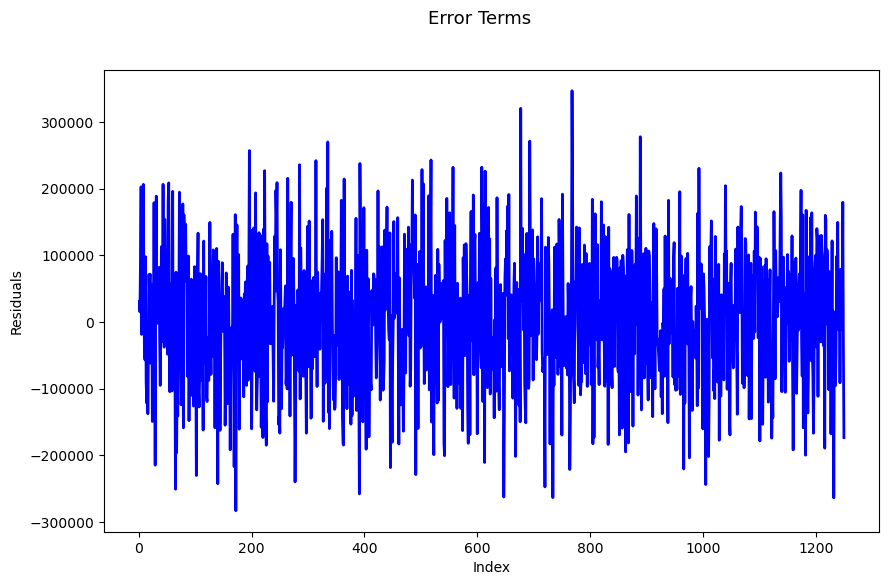

In [31]:
# Error terms
residuals = y_test - y_pred  # Calculate residuals (difference between true and predicted values)
c = [i for i in range(1, 1251, 1)]  # Generating index

# Create a new figure with specified size (e.g., width=10 inches, height=6 inches)
fig = plt.figure(figsize=(10, 6))

# Plotting the residuals
plt.plot(c, residuals, color="blue", linewidth=2, linestyle="-")

# Adding a title to the plot
fig.suptitle('Error Terms', fontsize=13)

# Adding labels to the x-axis and y-axis
plt.xlabel('Index', fontsize=10)
plt.ylabel('Residuals', fontsize=10)

# Displaying the plot
plt.show()


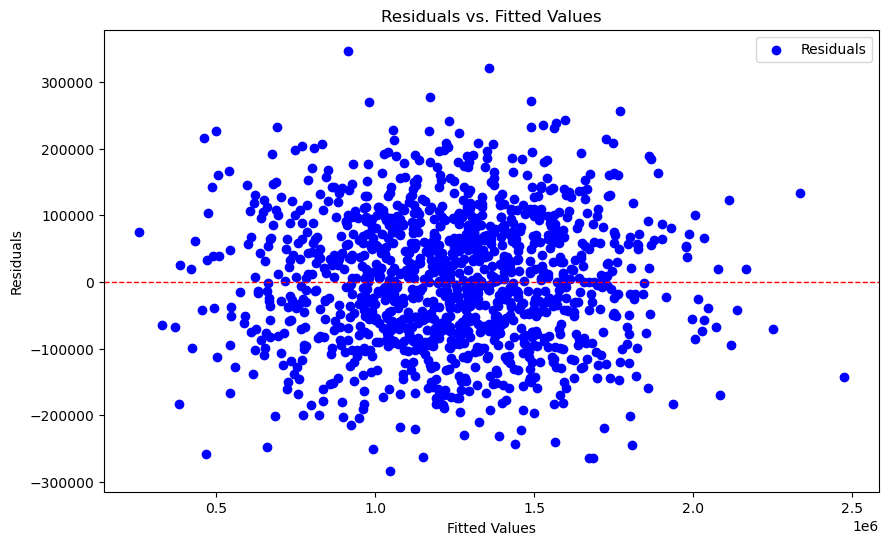

In [32]:
# Create a figure with specified size
plt.figure(figsize=(10, 6))

# Scatter plot of residuals vs. fitted values with different colors
plt.scatter(y_pred, residuals, color='blue', label='Residuals')

# Add reference line at y=0
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

# Set title, x-label, and y-label
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

# Add legend
plt.legend()

# Display the plot
plt.show()

These results suggest that your linear regression model has a moderately good fit to the data. The model can capture a significant portion of the relationship between the independent and dependent variables, with predictions being reasonably close to actual values on average.

## Predicting new data using Linear Regerssion Model

In [33]:
# Example new data (replace this with your actual new data)
new_data = {
    'Avg. Area Income': [79645.458574, 79248.642455, 61287.067179, 63345.240046, 59982.197226],
    'Avg. Area House Age': [5.682861, 6.002900, 5.865890, 7.188236, 5.040555],
    'Avg. Area Number of Rooms': [7.009188, 6.730821, 8.512727, 5.586729, 7.839388],
    'Avg. Area Number of Bedrooms': [4.09, 3.09, 5.13, 3.26, 4.23],
    'Area Population': [23086.800503, 40173.072174, 36882.159400, 34310.242831, 26354.109472]
}

In [34]:
new_df = pd.DataFrame(new_data)

# Predict using the trained model
predictions = lr.predict(new_df)

In [35]:
# Print predictions for each row in X_new
for i, pred in enumerate(predictions):
    print(f"Prediction for new_df[{i}]: {pred}")

Prediction for new_df[0]: 1226115.7734180135
Prediction for new_df[1]: 1494973.8842669204
Prediction for new_df[2]: 1250478.2531388882
Prediction for new_df[3]: 1121088.8830372645
Prediction for new_df[4]: 843470.0871445141


However, there's also room for improvement. Here's what to consider:

Domain Knowledge: Think about the scale of your data and the real-world implications of these errors. A 6000 unit error might be acceptable in one situation but unacceptable in another.


Alternative Metrics: Depending on your application, you might consider using other evaluation metrics alongside these. For instance, Mean Squared Error (MSE) might be useful if larger errors are particularly concerning.


Model Improvement: Explore ways to potentially improve the model's fit. This could involve:

Including additional relevant features

Addressing outliers in your data

Trying different model types (e.g., polynomial regression for non-linear relationships)

Tuning hyperparameters of the linear regression model

By carefully considering these factors and potentially refining your model, you can strive for a better fit and more accurate predictions.

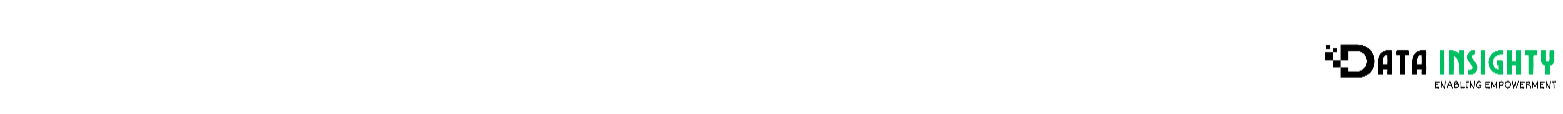